<a href="https://colab.research.google.com/github/abhishekkallarappayi/Phone_Price_Prediction/blob/main/PhonePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [66]:
df=pd.read_csv('Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [67]:
new_cols = ['Product_id','Sale','weight','resoloution','ppi','cpu core','cpu freq','internal mem','ram','RearCam','Front_Cam','battery','thickness','Price']
df=df[new_cols]

In [4]:
df.isna().sum()

Product_id      0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
Price           0
dtype: int64

In [25]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


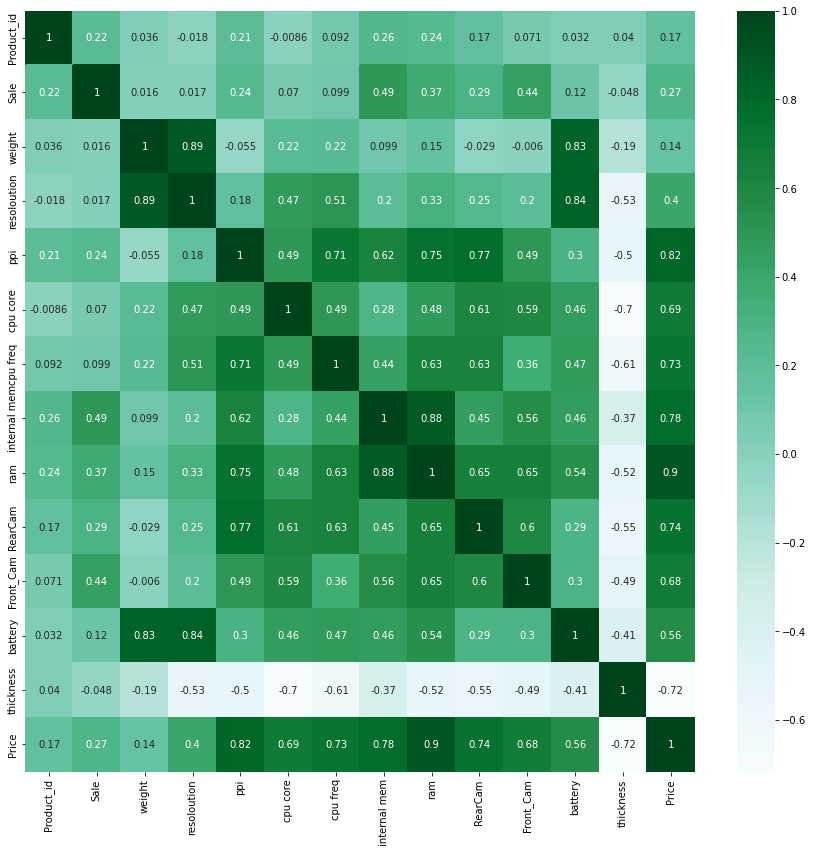

In [68]:
fig,ax=plt.subplots(figsize=(15,14))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="BuGn")
plt.show()

Drop the least important columns

In [69]:
df.drop(['Product_id','weight','Sale'],axis=1,inplace=True)

In [70]:
from sklearn.linear_model import LinearRegression
np.random.seed(5)
X=df.drop('Price',axis=1)
y=df['Price']
####
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2)
####
LR_model=LinearRegression()
LR_model.fit(train_x,train_y)

LinearRegression()

In [71]:
y_predict=LR_model.predict(test_x)

In [72]:
y_predict

array([1862.37459059, 1439.01224827, 2260.97640239, 2588.48478857,
       2588.48478857, 1962.65514523, 2698.11434352, 3329.98944704,
       1520.8111945 , 2690.49621459, 2480.77501679, 1474.42726623,
       1562.27281555, 2518.68091953, 3086.97290383, 1962.65514523,
       4143.41940531, 2344.49840302, 2825.21037986, 2219.20413919,
       1316.75496482, 3577.96389264, 2698.11434352, 1562.27281555,
       1368.26142769, 3547.47793942, 1926.49177291, 1521.44792127,
       1708.88676365,  349.66540775, 2326.98826787, 2756.59279617,
       1842.75062985])

In [73]:
score=r2_score(test_y,y_predict)
print('r2 socre is: ',score)

r2 socre is:  0.9338043907528295


Elastic net

In [34]:
from sklearn.linear_model import ElasticNet

elastic_reg=ElasticNet(alpha=1.0)
elastic_reg.fit(train_x,train_y)

ElasticNet()

Prediction

In [35]:
y_predict_elastic=elastic_reg.predict(test_x)

In [36]:
score_elastic=r2_score(test_y,y_predict_elastic)
print('r2 socre is: ',score_elastic)

r2 socre is:  0.9192145913578245


Lasso Estimator

In [37]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=1)
reg_lasso.fit(train_x,train_y)

Lasso(alpha=1)

In [38]:
y_predict_lasso=reg_lasso.predict(test_x)

R2 Score

In [39]:
score_lasso=r2_score(test_y,y_predict_lasso)
print('r2 socre is: ',score_lasso)

r2 socre is:  0.934016157328093


Cross Val Score

In [40]:
from sklearn.model_selection import cross_val_score
crossval_LR=cross_val_score(LR_model, X, y, cv=5,scoring='r2')
crossval_LR

array([0.842707  , 0.88134939, 0.94003624, 0.95700294, 0.96134282])

In [41]:
print('r2 socre is: ',np.mean(crossval_LR))

r2 socre is:  0.9164876783638778


elastic net cross validation

In [42]:
from sklearn.model_selection import cross_val_score
crossval_elastic_net=cross_val_score(elastic_reg, X, y, cv=5,scoring='r2')
crossval_elastic_net

array([0.85956937, 0.86021738, 0.95630553, 0.93782139, 0.94072225])

In [43]:
print('r2 socre is: ',np.mean(crossval_elastic_net))

r2 socre is:  0.9109271830128016


Lasso cross validation

In [44]:
from sklearn.model_selection import cross_val_score
crossval_lasso=cross_val_score(reg_lasso, X, y, cv=5,scoring='r2')
crossval_lasso

array([0.84316155, 0.87995332, 0.94119287, 0.95626403, 0.9607181 ])

In [45]:
print('r2 socre is: ',np.mean(crossval_lasso))

r2 socre is:  0.9162579760823292


Plotting the R2 score

([<matplotlib.axis.YTick at 0x7fa53b5cb9d0>,
 [Text(0, 0, 'Linear Regression'),
  Text(0, 0, 'elastic net'),
  Text(0, 0, 'Lasso')])

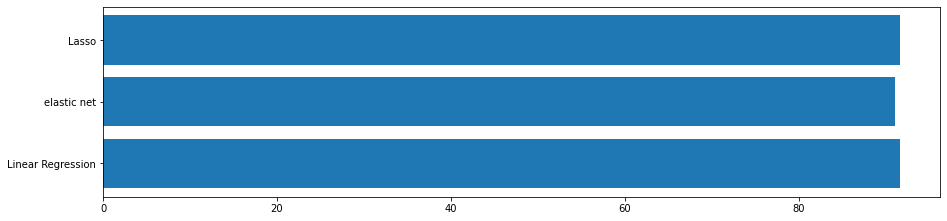

In [52]:
comparedict = {
  "Linear Regression": np.mean(crossval_LR)*100 ,
  "elastic net": np.mean(crossval_elastic_net)*100,
  "Lasso": np.mean(crossval_lasso)*100
}
fig, ax = plt.subplots(figsize=(15,3.5))
bars = ax.barh(range(len(comparedict)), list(comparedict.values()))
plt.yticks(range(len(comparedict)), list(comparedict.keys()))